In [1]:
import resource

memory_limit = 100 * 1024**3 # 100GB
resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE





In [3]:
from umap import UMAP

/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [7]:
#data_snp_phenotype = pd.read_csv('../data/data_snp_phenotype_012.csv', sep=',')
data_snp_phenotype = pd.read_pickle('/mnt/users/ib_2025/Corn_ML_project/data/012_recoded_X_subset_ib_2025.pkl.gz')


In [8]:

data_snp_phenotype_group = pd.read_pickle('/mnt/users/ib_2025/Corn_ML_project/data/012_recoded_X_full_ib_2025.pkl.gz')


In [9]:
data_snp_phenotype_group

,NC_024459.2:53013,NC_024459.2:53064,NC_024459.2:53109,NC_024459.2:56073,NC_024459.2:262740,NC_024459.2:262761,NC_024459.2:262785,NC_024459.2:262790,NC_024459.2:262793,NC_024459.2:262918,...,NC_024468.2:150831748,NC_024468.2:150832306,NC_024468.2:150847901,NC_024468.2:150847940,NC_024468.2:150898874,NC_024468.2:150898887,NC_024468.2:150898892,NC_024468.2:150911118,NC_024468.2:150911128,Heterotic group
0,1,2,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,NSS
1,1,2,1,2,2,1,1,1,1,1,...,1,1,2,0,2,2,2,0,0,SPT
2,1,1,1,2,2,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,NSS
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PB
4,0,2,0,2,2,1,1,1,1,1,...,2,2,2,1,2,2,2,1,1,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,PA
601,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,PA
602,1,2,1,2,2,1,1,1,1,1,...,0,2,2,0,2,2,2,1,1,PA
603,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,PA


In [10]:
heterotic_group = data_snp_phenotype_group['Heterotic group']
heterotic_group

0      NSS
1      SPT
2      NSS
3       PB
4       PA
      ... 
600     PA
601     PA
602     PA
603     PA
604    NSS
Name: Heterotic group, Length: 604, dtype: object

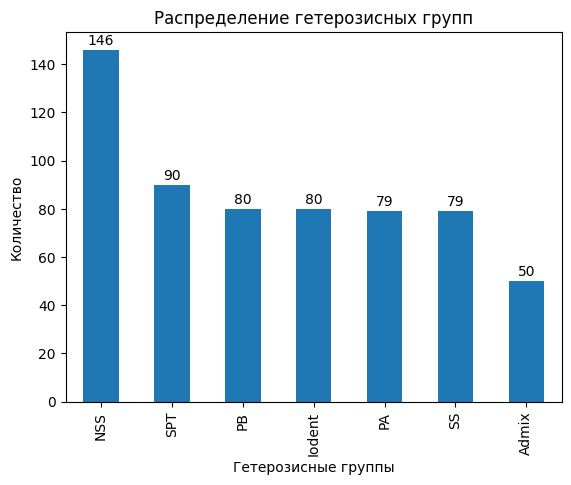

In [26]:
heterotic_group.value_counts().plot(kind='bar')
counts = heterotic_group.value_counts()
ax = counts.plot(kind='bar')
plt.title('Распределение гетерозисных групп')
plt.xlabel('Гетерозисные группы')
plt.ylabel('Количество')

for i, count in enumerate(counts):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)


In [11]:
data_snp_phenotype

,NC_024459.2:53013,NC_024459.2:53064,NC_024459.2:53109,NC_024459.2:56073,NC_024459.2:262740,NC_024459.2:262761,NC_024459.2:262785,NC_024459.2:262790,NC_024459.2:262793,NC_024459.2:262918,...,NC_024459.2:172851489,NC_024459.2:172851497,NC_024459.2:172851508,NC_024459.2:172851518,NC_024459.2:172964048,NC_024459.2:173069812,NC_024459.2:173069831,NC_024459.2:173069871,NC_024459.2:173074378,NC_024459.2:173074393
0,1,2,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,2,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,0,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
601,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
602,1,2,1,2,2,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0
603,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


Стандартизую разными способами

In [ ]:
data_snp_phenotype_StandardScaler = StandardScaler().fit_transform(data_snp_phenotype)
data_snp_phenotype_MinMaxScaler = MinMaxScaler().fit_transform(data_snp_phenotype)
data_snp_phenotype_RobustScaler = RobustScaler().fit_transform(data_snp_phenotype)

PCA

<Axes: >

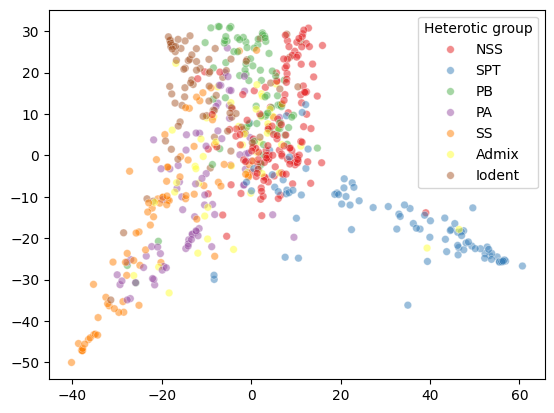

In [ ]:

pca_StandardScaler = PCA()

principal_components_StandardScaler = pca_StandardScaler.fit_transform(data_snp_phenotype)
sns.scatterplot(x=principal_components_StandardScaler[:, 0], y=principal_components_StandardScaler[:, 1], hue=heterotic_group, palette='Set1', 
    alpha=0.5, 
    s=30 
)

<Axes: >

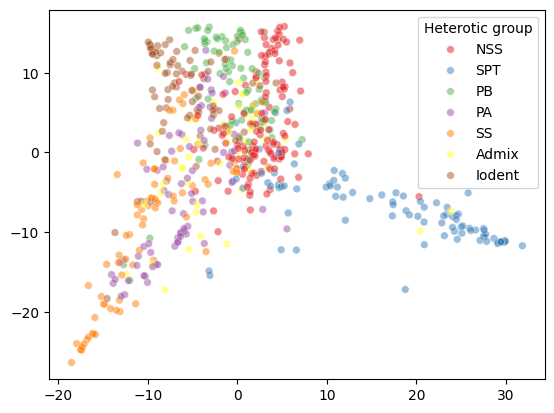

In [27]:
pca_MinMaxScaler = PCA()

principal_components_MinMaxScaler = pca_MinMaxScaler.fit_transform(data_snp_phenotype_MinMaxScaler)
sns.scatterplot(x=principal_components_MinMaxScaler[:, 0], y=principal_components_MinMaxScaler[:, 1], hue=heterotic_group, palette='Set1', 
    alpha=0.5, 
    s=30 
)

<Axes: >

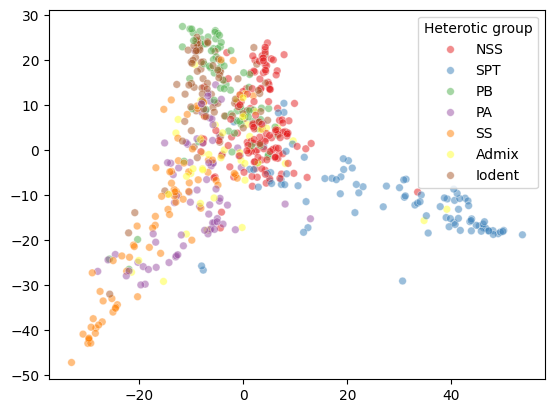

In [29]:
pca_data_snp_phenotype_RobustScaler = PCA()

principal_components_data_snp_phenotype_RobustScaler = pca_data_snp_phenotype_RobustScaler.fit_transform(data_snp_phenotype_RobustScaler)
sns.scatterplot(x=principal_components_data_snp_phenotype_RobustScaler[:, 0], y=principal_components_data_snp_phenotype_RobustScaler[:, 1], hue=heterotic_group, palette='Set1', 
    alpha=0.5, 
    s=30 )

TSNE

<Axes: >

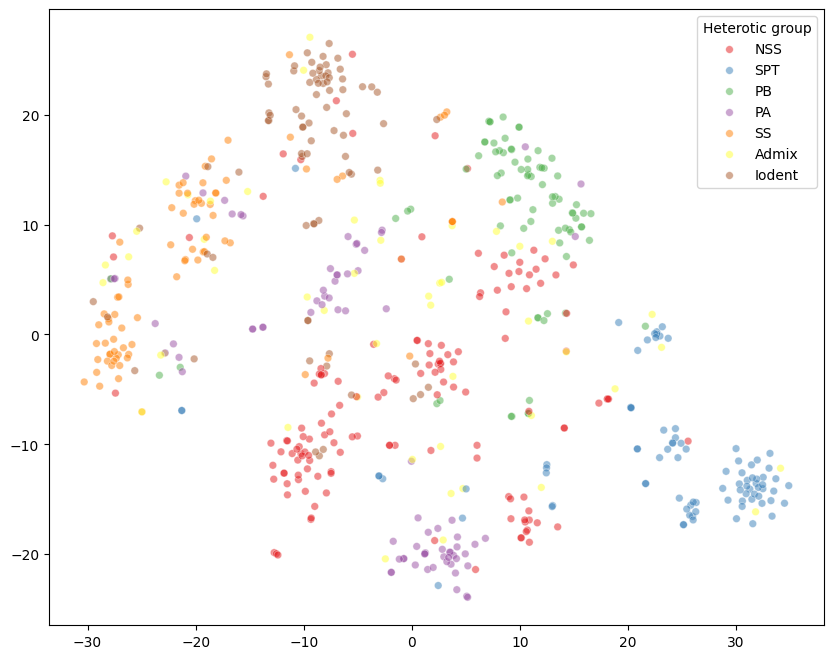

In [31]:
TSNE_ = TSNE(perplexity=30).fit_transform(data_snp_phenotype)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=TSNE_[:, 0], y=TSNE_[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)

<Axes: >

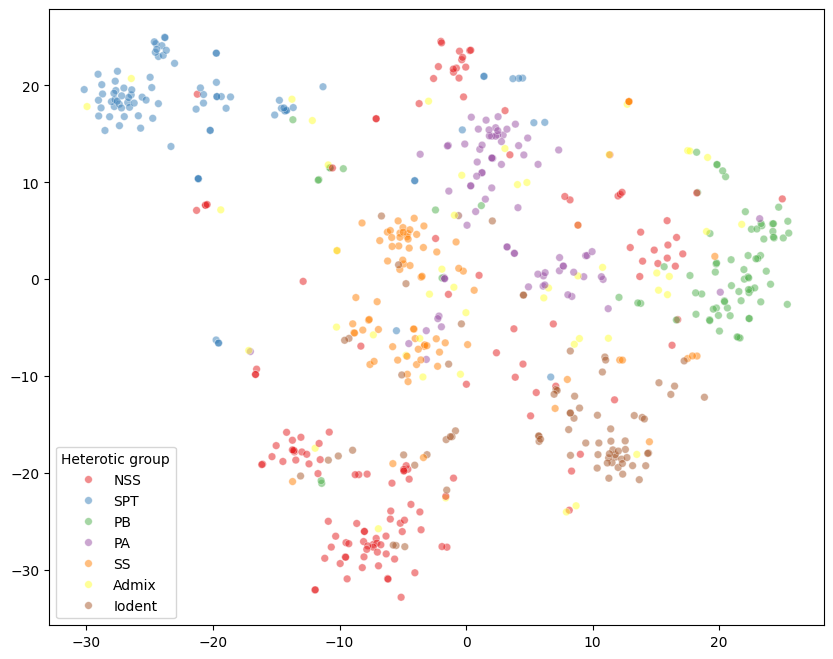

In [32]:
TSNE_StandardScaler = TSNE(perplexity=30).fit_transform(data_snp_phenotype_StandardScaler)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=TSNE_StandardScaler[:, 0], y=TSNE_StandardScaler[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)

<Axes: >

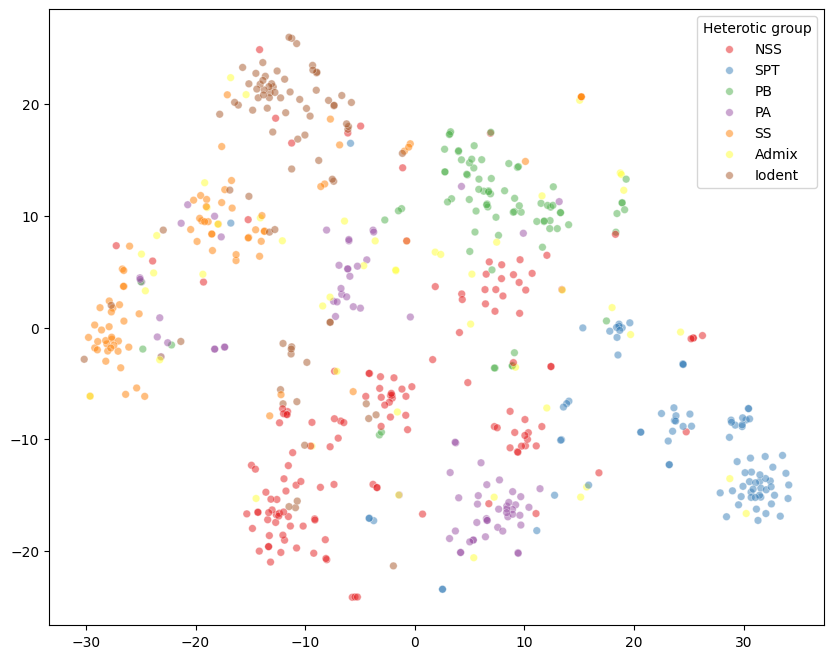

In [39]:
TSNE_RobustScaler = TSNE(perplexity=30).fit_transform(data_snp_phenotype_RobustScaler)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=TSNE_RobustScaler[:, 0], y=TSNE_RobustScaler[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)

UMAP

In [52]:
umap_model = UMAP(n_neighbors=25, min_dist= 0.4)
#umap_model_MinMaxScaler = UMAP()
#umap_model_RobustScaler = UMAP()

UMAP_ = umap_model.fit_transform(data_snp_phenotype)
#UMAP_MinMaxScaler = umap_model_MinMaxScaler.fit_transform(data_snp_phenotype_MinMaxScaler)
#UMAP_RobustScaler = umap_model_RobustScaler.fit_transform(data_snp_phenotype_RobustScaler)


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


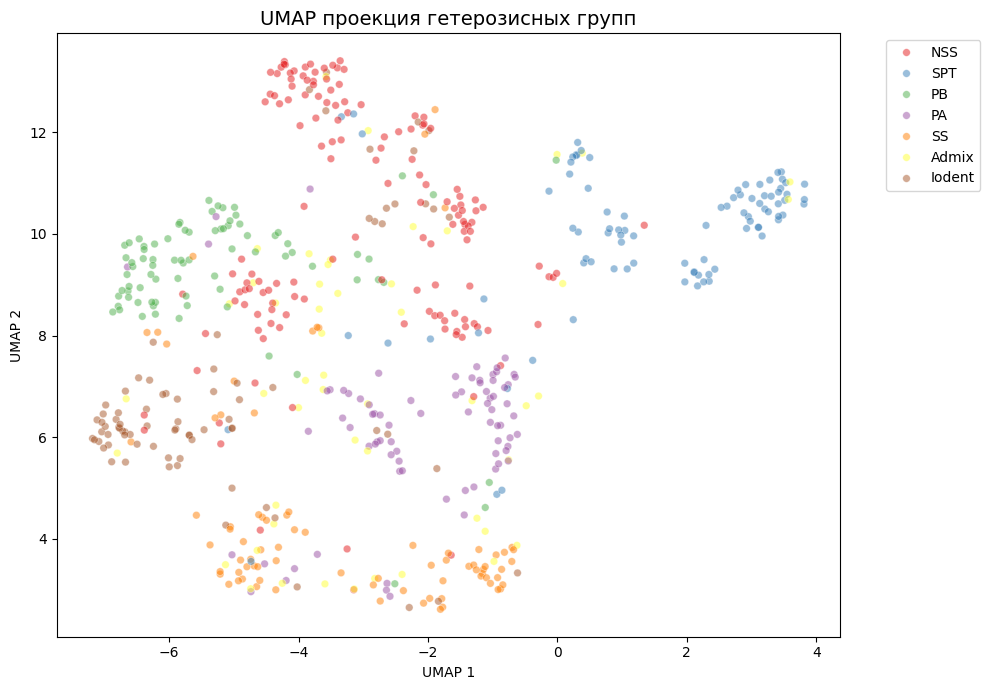

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=UMAP_[:, 0], y=UMAP_[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)
plt.title('UMAP проекция гетерозисных групп', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: >

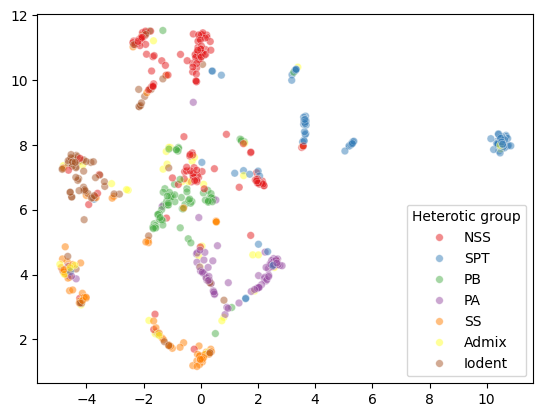

In [43]:
sns.scatterplot(x=UMAP_MinMaxScaler[:, 0], y=UMAP_MinMaxScaler[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)

<Axes: >

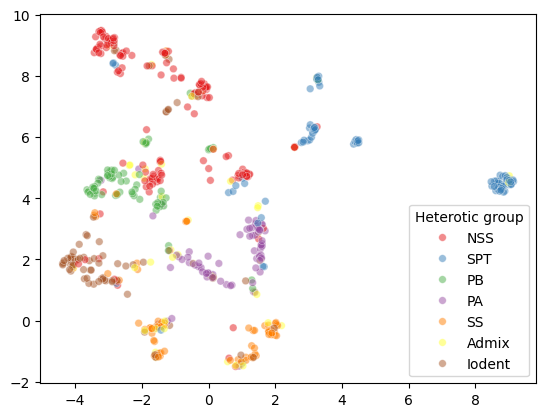

In [44]:
sns.scatterplot(x=UMAP_RobustScaler[:, 0], y=UMAP_RobustScaler[:, 1], hue=heterotic_group,  palette='Set1', alpha=0.5, s=30)

In [106]:
#data_snp_phenotype = data_snp_phenotype.drop(columns=['Subgroup'])

In [107]:
#def standardize_genotypes(data_snp_phenotype):
    #for col in data_snp_phenotype.columns[1:]:
        #data_snp_phenotype.loc[:, col] = data_snp_phenotype[col].apply(lambda x: '|'.join(sorted(x.split('|'))))

    #return data_snp_phenotype

#standardize_genotypes(data_snp_phenotype)

In [108]:
#df_wo_hetero_group = data_snp_phenotype.drop(columns=['Heterotic group'])
#all_values = df_wo_hetero_group.values.flatten()
#unique_values = pd.unique(all_values)
#unique_values

In [64]:
# Divide the data into X as a data for learning models aka features and y as a data the model should predict aka target
X = data_snp_phenotype # Генотипы
y = data_snp_phenotype_group["Heterotic group"]  # гетерозисная группа

In [65]:
X

,NC_024459.2:53013,NC_024459.2:53064,NC_024459.2:53109,NC_024459.2:56073,NC_024459.2:262740,NC_024459.2:262761,NC_024459.2:262785,NC_024459.2:262790,NC_024459.2:262793,NC_024459.2:262918,...,NC_024459.2:172851489,NC_024459.2:172851497,NC_024459.2:172851508,NC_024459.2:172851518,NC_024459.2:172964048,NC_024459.2:173069812,NC_024459.2:173069831,NC_024459.2:173069871,NC_024459.2:173074378,NC_024459.2:173074393
0,1,2,1,1,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,2,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,0,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
601,1,2,1,2,2,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
602,1,2,1,2,2,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0
603,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [66]:
y

0      NSS
1      SPT
2      NSS
3       PB
4       PA
      ... 
600     PA
601     PA
602     PA
603     PA
604    NSS
Name: Heterotic group, Length: 604, dtype: object

In [112]:
#def genotype_to_numeric(genotype, heterozygote):
    #alleles = genotype.split('|')
    
    #if alleles[0] != alleles[1]:
        #return 0
    #if alleles[0] == heterozygote[0]:
        #return 1
    #elif alleles[0] == heterozygote[1]:
        #return 2

    #return -1

#for column in X.columns:
    #heterozygote = None
    #first_genotype = None  
    #for idx, genotype in enumerate(X[column]):
       # alleles = genotype.split('|')
        
        #if alleles[0] == alleles[1]:
        #    if first_genotype is None:  
        #        first_genotype = genotype
        
        #if alleles[0] != alleles[1]:
          #  heterozygote = alleles
          #  break

   # if heterozygote is None:

       # X[column] = X[column].apply(lambda x: 1 if x == first_genotype else 2)
    #else:
        #X[column] = X[column].apply(lambda x: genotype_to_numeric(x, heterozygote))

#X


In [67]:
X.dtypes

NC_024459.2:53013        category
NC_024459.2:53064        category
NC_024459.2:53109        category
NC_024459.2:56073        category
NC_024459.2:262740       category
                           ...   
NC_024459.2:173069812    category
NC_024459.2:173069831    category
NC_024459.2:173069871    category
NC_024459.2:173074378    category
NC_024459.2:173074393    category
Length: 13830, dtype: object

In [68]:
X = X.astype('int8')


In [69]:
X.dtypes

NC_024459.2:53013        int8
NC_024459.2:53064        int8
NC_024459.2:53109        int8
NC_024459.2:56073        int8
NC_024459.2:262740       int8
                         ... 
NC_024459.2:173069812    int8
NC_024459.2:173069831    int8
NC_024459.2:173069871    int8
NC_024459.2:173074378    int8
NC_024459.2:173074393    int8
Length: 13830, dtype: object

In [70]:
X.shape

(604, 13830)

In [71]:
y.shape

(604,)

In [72]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [75]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=10,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    cat_features=X.columns.tolist(),  
    verbose=100,
    random_seed=42,
    early_stopping_rounds=20,
    used_ram_limit='32gb',
    thread_count=1,
    bagging_temperature = 0.8
)

In [76]:
model.fit(
    X_train,
    y_train,
    eval_set=(X_val, y_val),
    use_best_model=True,
    verbose=10
)

0:	learn: 0.3602484	test: 0.4000000	best: 0.4000000 (0)	total: 26.4s	remaining: 43m 37s
10:	learn: 0.4865424	test: 0.4833333	best: 0.5000000 (9)	total: 4m 54s	remaining: 39m 41s
20:	learn: 0.5175983	test: 0.5333333	best: 0.5333333 (20)	total: 9m 24s	remaining: 35m 21s
30:	learn: 0.5527950	test: 0.5500000	best: 0.5500000 (30)	total: 13m 53s	remaining: 30m 55s
40:	learn: 0.5962733	test: 0.6000000	best: 0.6000000 (39)	total: 18m 22s	remaining: 26m 25s
50:	learn: 0.6293996	test: 0.5833333	best: 0.6000000 (39)	total: 23m	remaining: 22m 6s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6
bestIteration = 39

Shrink model to first 40 iterations.


CatBoost is using more CPU RAM (32.9GiB) than the limit (32GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(32536) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(32536) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(32536) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(32536) > ResourceQuota(0)


In [77]:
train_accuracy_filtered_data = accuracy_score(y_train, model.predict(X_train))
test_accuracy_filtered_data = accuracy_score(y_test, model.predict(X_test))
print(f"Train accuracy: {train_accuracy_filtered_data}")
print(f"Test accuracy: {test_accuracy_filtered_data}")

train_precision = precision_score(y_train, model.predict(X_train), average='weighted')
test_precision = precision_score(y_test, model.predict(X_test), average='weighted')
print(f"Train precision: {train_precision}")
print(f"Test precision: {test_precision}")

train_recall = recall_score(y_train, model.predict(X_train), average='weighted')
test_recall = recall_score(y_test, model.predict(X_test), average='weighted')
print(f"Train recall: {train_recall}")
print(f"Test recall: {test_recall}")

train_f1 = f1_score(y_train, model.predict(X_train), average='weighted')
test_f1 = f1_score(y_test, model.predict(X_test), average='weighted')
print(f"Train F1-score: {train_f1}")
print(f"Test F1-score: {test_f1}")

train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print(f"Train ROC AUC: {train_roc_auc}")
print(f"Test ROC AUC: {test_roc_auc}")

Train accuracy: 0.6066252587991718
Test accuracy: 0.5573770491803278


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train precision: 0.7030560541978027
Test precision: 0.5319672131147541
Train recall: 0.6066252587991718
Test recall: 0.5573770491803278
Train F1-score: 0.5567550622771138
Test F1-score: 0.4963924535766387
Train ROC AUC: 0.9450483330445298
Test ROC AUC: 0.9187850744513114


In [80]:
train_precision = precision_score(y_train, model.predict(X_train), average=None)
test_precision = precision_score(y_test, model.predict(X_test), average=None)


train_recall = recall_score(y_train, model.predict(X_train), average=None)
test_recall = recall_score(y_test, model.predict(X_test), average=None)


train_f1 = f1_score(y_train, model.predict(X_train), average=None)
test_f1 = f1_score(y_test, model.predict(X_test), average=None)


classes = model.classes_

print("Train:")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision={train_precision[i]:.3f}, Recall={train_recall[i]:.3f}, F1={train_f1[i]:.3f}")

print("\nTest:")
for i, cls in enumerate(classes):
    print(f"{cls}: Precision={test_precision[i]:.3f}, Recall={test_recall[i]:.3f}, F1={test_f1[i]:.3f}")


/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/users/ib_2025/miniforge3/envs/corn_catboost/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.786, Recall=0.688, F1=0.733
NSS: Precision=0.404, Recall=0.949, F1=0.566
PA: Precision=0.789, Recall=0.476, F1=0.594
PB: Precision=0.977, Recall=0.672, F1=0.796
SPT: Precision=0.928, Recall=0.889, F1=0.908
SS: Precision=1.000, Recall=0.016, F1=0.031

Test:
Admix: Precision=0.000, Recall=0.000, F1=0.000
Iodent: Precision=0.750, Recall=0.375, F1=0.500
NSS: Precision=0.417, Recall=1.000, F1=0.588
PA: Precision=0.600, Recall=0.750, F1=0.667
PB: Precision=0.800, Recall=0.500, F1=0.615
SPT: Precision=1.000, Recall=0.667, F1=0.800
SS: Precision=0.000, Recall=0.000, F1=0.000
